In [45]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn style for better visuals
sns.set_style('whitegrid')
%matplotlib inline

In [47]:
# Define the ticker and date range
ticker = 'RELIANCE.NS'
start_date = '2020-01-01'
end_date = '2025-07-30'

# Fetch data using yfinance
stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

# Display the first few rows
print(stock_data.head())

Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2020-01-01  678.021362  685.881324  676.179942  681.794149    14004468
2020-01-02  689.564331  692.101988  679.099372  679.099372    17710316
2020-01-03  690.395203  692.416334  684.039846  688.531236    20984698
2020-01-06  674.383362  686.240613  672.811358  682.692450    24519177
2020-01-07  684.758545  689.205022  679.773056  682.243314    16683622


In [48]:
# Alternative: Create a sample dataset if yfinance is unavailable
dates = pd.date_range(start='2020-01-01', end='2020-12-31', freq='B')
np.random.seed(42)
sample_data = {
    'Open': np.random.uniform(1400, 1600, len(dates)),
    'High': np.random.uniform(1450, 1650, len(dates)),
    'Low': np.random.uniform(1350, 1550, len(dates)),
    'Close': np.random.uniform(1400, 1600, len(dates)),
    'Adj Close': np.random.uniform(1400, 1600, len(dates)),
    'Volume': np.random.randint(1000000, 10000000, len(dates))
}
stock_data = pd.DataFrame(sample_data, index=dates)
stock_data.to_csv('reliance_sample_data.csv')

# Display sample dataset
print(stock_data.head())

                   Open         High          Low        Close    Adj Close  \
2020-01-01  1474.908024  1478.016803  1517.665741  1516.678359  1574.019775   
2020-01-02  1590.142861  1553.665930  1443.738632  1480.170283  1404.253882   
2020-01-03  1546.398788  1625.474614  1432.963900  1492.401161  1574.940335   
2020-01-06  1519.731697  1598.153724  1404.681414  1589.456668  1505.787427   
2020-01-07  1431.203728  1589.403148  1361.275099  1430.670281  1587.813540   

             Volume  
2020-01-01  9546310  
2020-01-02  3851274  
2020-01-03  2225811  
2020-01-06  4081091  
2020-01-07  4829049  


In [49]:
# Basic information about the dataset
print(stock_data.info())
print("\nSummary Statistics:")
print(stock_data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-01-01 to 2020-12-31
Freq: B
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       262 non-null    float64
 1   High       262 non-null    float64
 2   Low        262 non-null    float64
 3   Close      262 non-null    float64
 4   Adj Close  262 non-null    float64
 5   Volume     262 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 13.3 KB
None

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count   262.000000   262.000000   262.000000   262.000000   262.000000   
mean   1498.536012  1552.920911  1445.724732  1496.906563  1502.880626   
std      59.386523    60.509752    56.263538    58.388343    60.004859   
min    1401.012317  1452.167530  1352.908933  1400.926405  1401.277174   
25%    1447.469240  1506.038244  1395.998344  1445.191165  1446.980020   
50%    1501.124971  1557.673

In [50]:
# Calculate daily returns
stock_data['Daily Returns'] = stock_data['Close'].pct_change() * 100

# Calculate 20-day and 50-day moving averages
stock_data['20_MA'] = stock_data['Close'].rolling(window=20).mean()
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()

# Display the updated dataframe
print(stock_data[['Close', 'Daily Returns', '20_MA', '50_MA']].tail())

                  Close  Daily Returns        20_MA        50_MA
2020-12-25  1525.178275       4.196601  1497.503307  1508.570968
2020-12-28  1577.195550       3.410570  1496.920419  1510.670983
2020-12-29  1523.172638      -3.425251  1498.336909  1512.768108
2020-12-30  1446.591895      -5.027713  1492.046077  1510.030691
2020-12-31  1404.880156      -2.883449  1483.844591  1509.581020


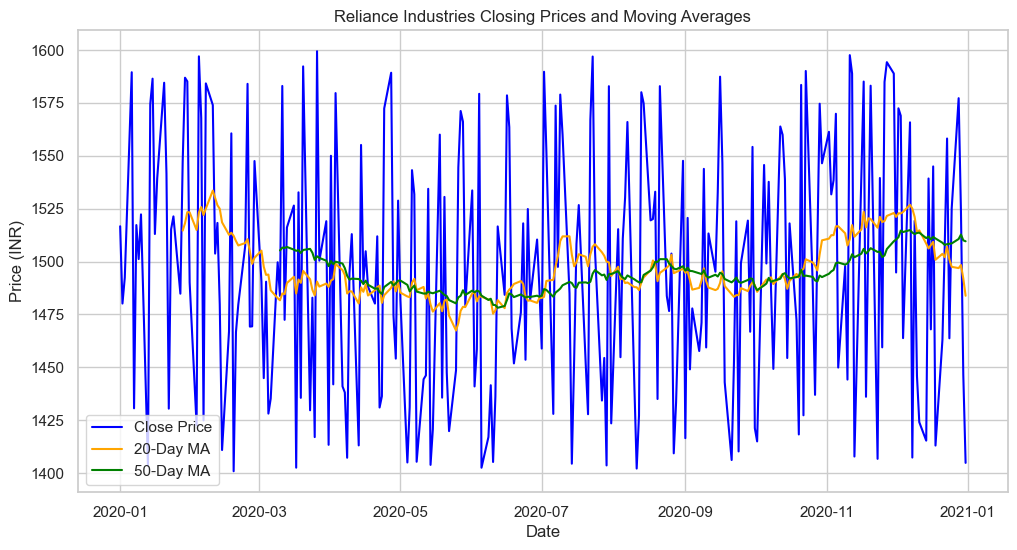

In [51]:
# Plot closing prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['20_MA'], label='20-Day MA', color='orange')
plt.plot(stock_data['50_MA'], label='50-Day MA', color='green')
plt.title('Reliance Industries Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

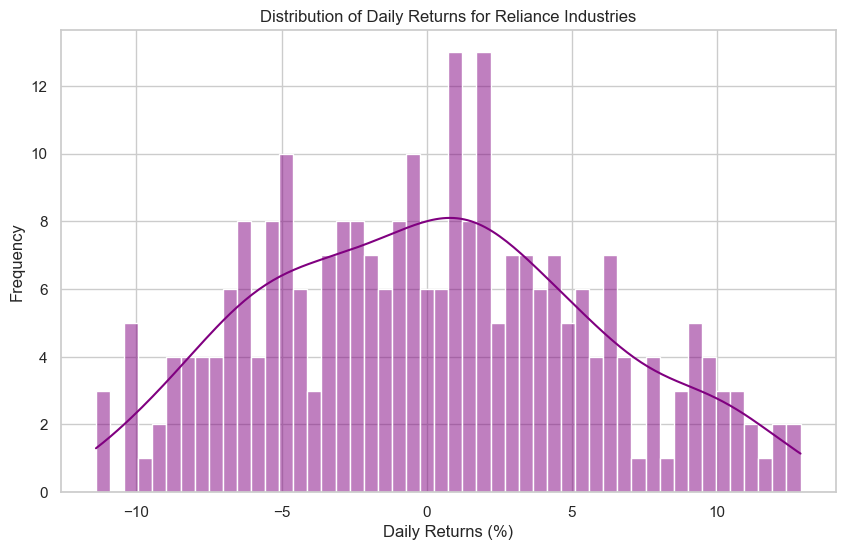

In [52]:
# Plot distribution of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['Daily Returns'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Daily Returns for Reliance Industries')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.show()

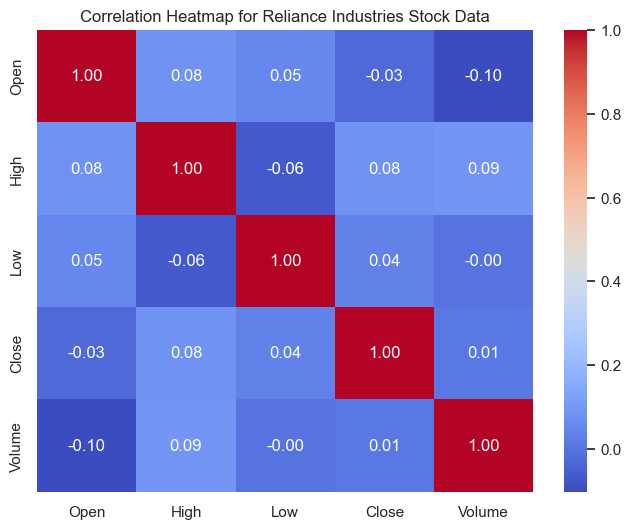

In [53]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Reliance Industries Stock Data')
plt.show()

In [54]:
# Save the processed data
stock_data.to_csv('reliance_processed_data.csv')